<a href="https://colab.research.google.com/github/StephenMa1511/PortfolioOptimization/blob/main/WQU_PORFOLIO_MANAGEMENT_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf
import pandas_datareader as web
from datetime import datetime as dt, timedelta as td
import numpy as np

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

# Step 1.a

The Fama and French (1993) three - factors model aims to depict the relationship between the average returns of a stock or a stock portfolio and three key factors: Market risk premium, Size (represented by market capitalization, which is the product of price and shares outstanding) and Price ratios such as B/M (Book to Market) ratio.  The model takes the form as follows:
$$ R_{it} - R_{Ft} = a_i + b_i(R_{Mt} - R_{Ft}) + s_i SMB_t + h_i HML_t + e_{it}  $$
Where:

$R_{it}$ is the return on stock or porfolio i for period t

$ R_{Ft} $ is the risk free rate (usually the 10 year Treasury Yield)

$ R_{Mt} $ is the return on the value-weight market portfolio for period t

$ SMB_t $ is the  the excess returm of a diversified portfolio of small stocks over a diversified portfolio of big stocks

$ HML_t $ is the is the difference between the returns on diversified portfolios
of high and low B/M stocks.

$ e_{it} $ is a zero mean error term

$ a_i, b_i, s_i, h_i$ are the intercept and the factor loadings

In the following paragraphs, we will describe in detail each of the 3 factors in the FF3 model







**Definition and measurement of variables**

Market equity or Firm size (ME) is defined as the market price of a stock
multiplied by its outstanding shares.

Book value of a firm’s common stock (BE): this is the sum of the value of common equity deferred taxes and tax credit from investment minus the value of preferred stocks.


Book-to-market equity: the ratio of BE/ME

Based on intersection of 2 groups of company size and and 3 groups of book to market equity ratio, Fama and French (1992b) formed six portfolios namely: S/L (small firms that also have low values of BE/ME), S/M(small firm, medium BE/ME), SH (small firms, high BE/ME), B/L (big firms, low BE/ME), B/M (big firms, medium BE/ME), B/H (big firms, high BE/ME). The split point for the size feature is the median, as for the book to market equity feature, the 70% and 30% percentiles are used.



1. Market risk premium $R_{Mt} - R_{Ft}$: this is the monthly value-weight return on the market portfolio of all sample stocks minus the one-month Treasury bill rate. It accounts for the systematic risk premium portion of our porfolio, in other words, it is the CAPM part of the FF3 model.

2. Size Premium $ SMB_t $ (small minus big): this factor is designed to express the risk premium in the returns of the stock/portfolio which is related to size factor. It is the difference between the simple average of the returns on the three small-stock portfolios and the simple average of the returns on the three big-stock portfolios. Thus, this difference should be largely free of the influence of BE/ME, focusing instead on the different return behaviors of small and big stocks (Fama & French, 1992, p.9). The mathematical form is as follow:
$$ SMB_t = (\frac{S/L + S/M + S/H}{3}) - (\frac{B/L + B/M + B/H}{3})$$

3. Value premium ($HML_t$): this factor is intended to mimic the risk premium related to book to market equity in the return of the stock/portfolio. It is the monthly difference between the simple average returns of the two
high BE/ME portfolios and the simple average returns of the two
low BE/ME portfolios.Thus the difference between the two returns should be largely free of the size factor in returns, focusing instead on the different return behaviors of high- and low BE/ME firms (Fama & French, 1992, p.9).The mathematical form is as follow:
$$ HML_t = (\frac{S/H + B/H}{2}) - (\frac{S/L + B/L}{2}) $$

# Step 1.b

The FF3 factors helps to explains variation in stock return due to several reason.The market premium factor relate the variance of the portfolio excess return to systematic risk - the risk involve broad macro factors and affects all securities. Fama and French (2017) also took a redundancy test for the market premium and found no such evidence for North America, Europe, and Asia Pacific.

The size factor account for the empirical observation that small cap stocks tend to outperform large-cap stocks over time (Fama and French, 1996, p.56).Howerver, in their 2017 paper, "International Tests of a Five-Factor Asset Pricing Model", they stated that "Finally, at least for 1990-2015
the Size factor SMB seems redundant everywhere except North America". Additionally, Horowitz et al. (2000) argued that no discernible evidence of the small-cap effect existed in the US stock market between 1980 and 1996. Notably, institutional investors have demonstrated a preference for large-cap stocks over the course of the past two decades.

As for the value premium, the work of Fama and French in "Value versus Growth: The International Evidence.",1988 show a tendency of excess return of value stock over growth stock, thus validating an explaination power of value factor to stock return. Interestingly, in recent years papers, Fama and French (2017) has pointed out that for the period spanned from 1969-2013 in the US, the value factor (HML) seems redundant as its average return is fully explained by the average return of the other four factor in FF5, but in case of a shorter time horizon of 1990-2015, they found that the HML factor is important for describing average returns in all regions. In another work, Asness et al (2013) examined equity markets in 18 developed countries/regions and found numerous evidence for the value premium.



Reference



Fama, Eugene F., and Kenneth R. French. 2017. *International Tests of a Five-Factor Asset Pricing Model*. Journal of Financial Economics.

Fama, Eugene F., and Kenneth R. French. 2015.*A five-factor asset pricing model*. Journal of Financial Economics.

Fama, Eugene F., and Kenneth R. French. 1996. *Multifactor Explanations of Asset
Pricing Anomalie*. The Journal of Finance . vol. L1, No.1

Fama, Eugene F., and Kenneth R. French. 1996. *Multifactor Explanations of Asset
Pricing Anomalies*.  The Journal of Finance . vol. L1, No.1

Fama, Eugene F., and Kenneth R. French. 1992. *Common risk factors in the returns on stocks and bonds* . Journal of Financial Economics 33.

Horowitz, Joel L., Tim Loughran, and N. E. Savin. 2000. *Three Analyses of the Firm Size Premium*. Journal of Empirical Finance 7.

Yu-Shang Kuo, Jen-Tsung Huang. 2022. *Factor-Based Investing in Market Cycles: Fama–French Five-Factor Model of Market Interest Rate and Market Sentiment*. Journal of Risk and Finnacial Management.

Asness, Clifford S., Tobias J. Moskowitz, and Lasse Heje Pedersen. 2013. *Value and Momentum Everywhere*. The Journal of Finance 68.

https://blogs.cfainstitute.org/investor/2022/01/10/fama-and-french-the-five-factor-model-revisited/

# Step 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this step, we will be using APPL stock as dependent variable in the regression test with FF3 model.

[*********************100%%**********************]  1 of 1 completed


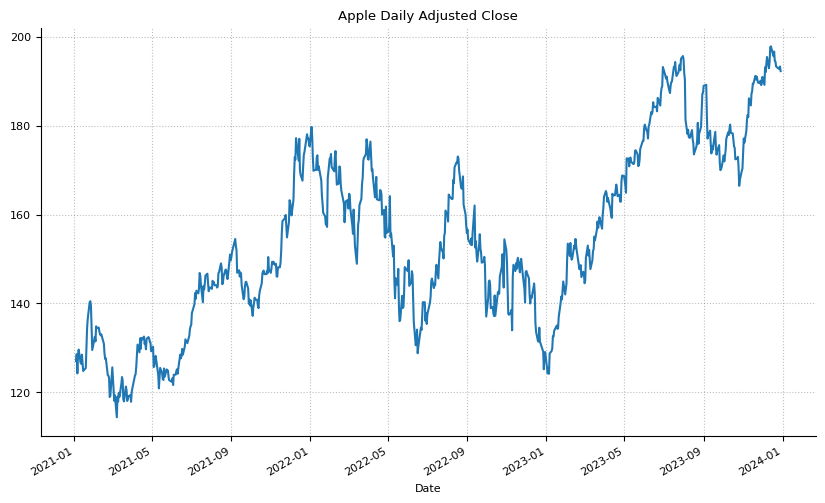

In [ ]:
aapl_daily = yf.download("AAPL", start="2021-01-01", end="2023-12-31")
aapl_daily["Adj Close"].plot(title="Apple Daily Adjusted Close", figsize=(10, 6))
plt.show()

In [ ]:
aapl_daily.index = aapl_daily.index.to_period("D")
aapl_daily["Return"] = aapl_daily["Adj Close"].pct_change() * 100
aapl_daily.dropna(inplace=True)
aapl_daily

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572342,97664900,1.236404
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000,-3.366165
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200,3.412326
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200,0.863126
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.580109,100384500,-2.324878
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.554743
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.284092
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.051790


We retrived the factors of FF3 model from the public website at : https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [ ]:
# ff_factors_daily = pd.read_csv(
#     "./data/F-F_Research_Data_Factors_daily.CSV", index_col=0
# )

ff_factors_daily = pd.read_csv("/content/drive/MyDrive/WQU Portfolio Management/WQU Portfolio Management GWP/GWP 1/F-F_Research_Data_Factors_daily.CSV", index_col=0)
ff_factors_daily.index.names = ["Date"]
ff_factors_daily.index = pd.to_datetime(ff_factors_daily.index, format="%Y%m%d")
ff_factors_daily.index = ff_factors_daily.index.to_period("D")
ff_factors_daily


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2024-03-22,-0.23,-0.87,-0.53,0.021
2024-03-25,-0.26,-0.24,0.88,0.021
2024-03-26,-0.26,0.09,-0.13,0.021


In [ ]:
ff_factors_subset = ff_factors_daily[
    ff_factors_daily.index.isin(aapl_daily.index)
].copy()

ff_factors_subset["Excess_Return"] = aapl_daily["Return"] - ff_factors_subset["RF"]
ff_factors_subset


,Mkt-RF,SMB,HML,RF,Excess_Return
Date,,,,,
2021-01-05,0.86,1.23,0.49,0.000,1.236404
2021-01-06,0.79,2.14,3.94,0.000,-3.366165
2021-01-07,1.76,0.33,-0.83,0.000,3.412326
2021-01-08,0.51,-0.75,-1.37,0.000,0.863126
2021-01-11,-0.51,0.26,1.26,0.000,-2.324878
...,...,...,...,...,...
2023-12-22,0.20,0.64,0.09,0.021,-0.575743
2023-12-26,0.48,0.69,0.46,0.021,-0.305092
2023-12-27,0.16,0.14,0.12,0.021,0.030790


Below are the plots of daily factor returns of 2 year period from 2021 to 2023

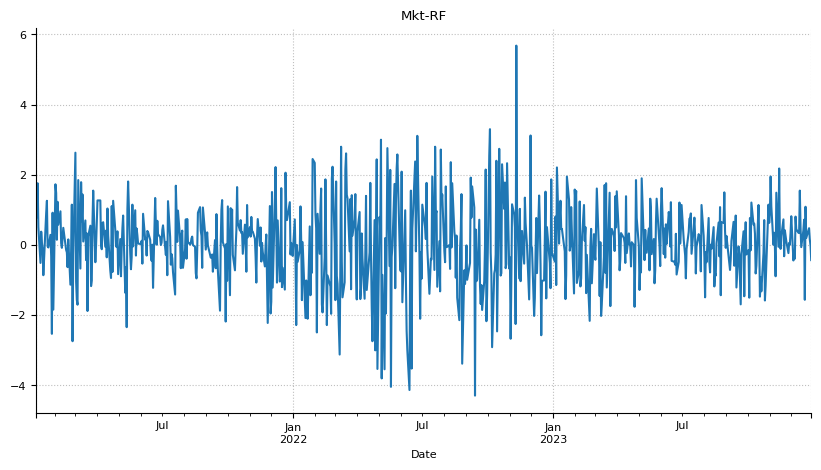

In [ ]:
ff_factors_subset["Mkt-RF"].plot(title="Mkt-RF", figsize=(10, 5))
plt.show()


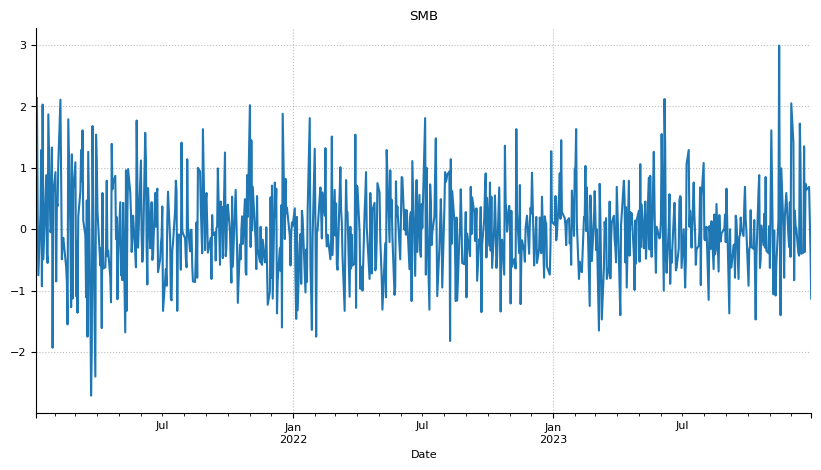

In [ ]:
ff_factors_subset["SMB"].plot(title="SMB", figsize=(10, 5))
plt.show()


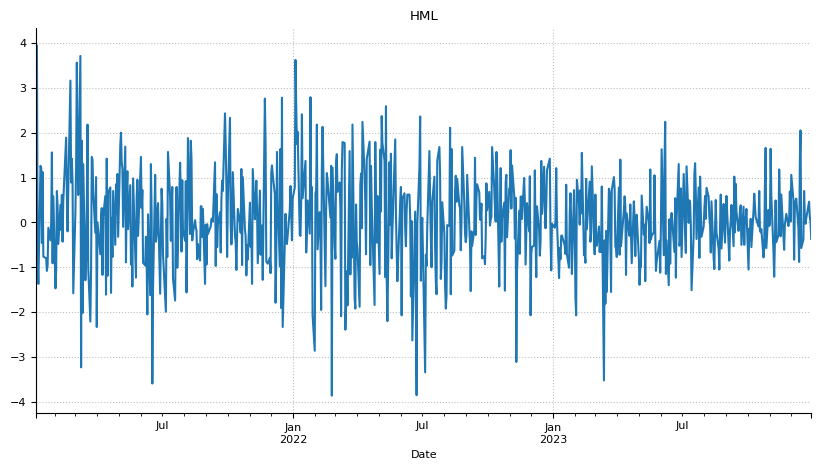

In [ ]:
ff_factors_subset["HML"].plot(title="HML", figsize=(10, 5))
plt.show()


In [ ]:
display(ff_factors_subset.iloc[:,:3].diff().corr())

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.347301,-0.371131
SMB,0.347301,1.000000,-0.146633
HML,-0.371131,-0.146633,1.000000


The correlation matrix of the changes in factor returns is present in the table below. We noticed that the both SMB's and HML's correlation with the Market premium are about of the same magnitude around 0.34-0.37, but opposite site. Additionally, the correlation between SMB and HML is negatively weak at -0.147.

In [ ]:
#Collect economic data
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2021, 1, 1)

end = datetime.datetime(2023, 12, 31)

econData = web.DataReader(['CPIAUCNS', 'GDP'], 'fred', start, end)


# **Step 3: FF3 model**

In this step, we will use Ordinary least square and Robust Regression to find the Betas for factors in FF3.
The 2 years data will be splitted into training and testing set with the ratio 80/20 respectively, we don not shuffle the data to maintain its chronological order

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = sm.add_constant(ff_factors_subset[["Mkt-RF", "SMB", "HML"]])
y = ff_factors_subset["Excess_Return"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

In [ ]:
import statsmodels.api as sm
# X = sm.add_constant(ff_factors_subset[["Mkt-RF", "SMB", "HML"]])
# y = ff_factors_subset["Excess_Return"]
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     450.0
Date:                Sat, 04 May 2024   Prob (F-statistic):          1.03e-148
Time:                        19:08:08   Log-Likelihood:                -817.25
No. Observations:                 564   AIC:                             1643.
Df Residuals:                     560   BIC:                             1660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0555      0.044      1.272      0.2

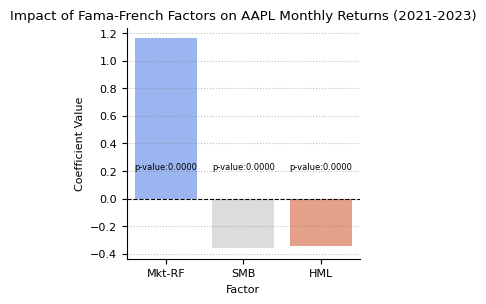

In [ ]:
factors = model.params.index[1:]
coefficients = model.params.values[1:]
confidence_intervals = model.conf_int().diff(axis=1).iloc[1]

ols_data = pd.DataFrame(
    {
        "Factor": factors,
        "Coefficient": coefficients,
        "Confidence_Lower": confidence_intervals[0],
        "Confidence_Upper": confidence_intervals[1],
    }
)

plt.figure(figsize=(3, 3))
sns.barplot(x="Factor", y="Coefficient", data=ols_data, capsize=0.2, palette="coolwarm")

for i, row in ols_data.iterrows():
    plt.text(i,0.2,f"p-value:{model.pvalues[row['Factor']]:.4f}",ha="center",va="bottom",
        fontsize=6,
    )

plt.title("Impact of Fama-French Factors on AAPL Monthly Returns (2021-2023)")
plt.xlabel("Factor"); plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.show()


With the OLS method applied on the train set, we could see from the resulting table that, in the 1.5 years period, the FF3 model are able to explain 70% of the variance in the APPL stock return. All the betas are stattiscally significant at 1% level. The largest coefficent belongs to the Market premium factor with beta of 1.15 implying that the risk premium of APPL is higher than that of the overall market. The beta for SMB is -0.359 indicating that the return of AAPL stock negatively related to the size premium, this is relatively straightforward since Apple is the largest company in the world. As for HML, the beta is at -0.344, this is reasonable since AAPL stock always has a relatively low Book to Equity ratio which imply that it is on the category of growth stock more than in the value one.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = model.predict(X_test)
print('Out of sample R2: ',r2_score(y_test, y_pred))

Out of sample R2:  0.521472104048175


Moving to out of sample test, it is not surprising to the the R2 score plunge to 0.52 in the test set as the Fama French FF3/FF5 model is designed to decompose stock return into observable risk factor, not to predict return.

This time, we will regress the stock return on FF3 factors for the whole 2 years period the get the full sample betas

In [ ]:
model_ff3 = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     450.0
Date:                Sat, 04 May 2024   Prob (F-statistic):          1.03e-148
Time:                        19:08:09   Log-Likelihood:                -817.25
No. Observations:                 564   AIC:                             1643.
Df Residuals:                     560   BIC:                             1660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0555      0.044      1.272      0.2

Next, we'll try using Robust regression with Bisquare Method to see the change in the betas of factors


In [ ]:
rr_bisquare = sm.RLM(
    ff_factors_subset["Excess_Return"],
    sm.add_constant(ff_factors_subset[["Mkt-RF", "SMB", "HML"]]),
    M=sm.robust.norms.TukeyBiweight(),
)
rr_bisquare_results = rr_bisquare.fit()
print(rr_bisquare_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          Excess_Return   No. Observations:                  752
Model:                            RLM   Df Residuals:                      748
Method:                          IRLS   Df Model:                            3
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 04 May 2024                                         
Time:                        19:08:09                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0339      0.030      1.121      0.2

Compared to the classic OLS, the Robust Linear Regression(RLR)  with bisquare method are assign less weight to outliers. The beta of Market premium factor accquired from this method would change much compared to OLS' result. Meanwhile, the beta for SMB decreased from -0.3427 in OLS to -0.3865 in RLR, and HML betas slightly increase from -0.3442 to -0.3222 respectively. We could conclude that, with a robust to outlier regession method, AAPL stock size premium is negatively magnified whereas the value premium is somewhat lessen.

# **Step 4: FF5 Model**

In this step we will use factors from FF5 model to deompose the risk premium in the return of Apple stock

In [ ]:
# ff_factors_daily = pd.read_csv("./data/F-F_Research_Data_5_Factors_2x3_daily.CSV", index_col=0)
ff_factors_daily = pd.read_csv("/content/drive/MyDrive/WQU Portfolio Management/WQU Portfolio Management GWP/GWP 1/F-F_Research_Data_5_Factors_2x3_daily.CSV", index_col=0)
ff_factors_daily.index.names = ["Date"]
ff_factors_daily.index = pd.to_datetime(ff_factors_daily.index, format="%Y%m%d")
ff_factors_daily.index = ff_factors_daily.index.to_period("D")
ff_factors_daily


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...
2024-03-22,-0.23,-0.98,-0.53,0.29,-0.37,0.021
2024-03-25,-0.26,-0.10,0.88,-0.22,-0.17,0.021
2024-03-26,-0.26,0.10,-0.13,-0.50,0.23,0.021


In [ ]:
aapl_daily

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572342,97664900,1.236404
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000,-3.366165
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200,3.412326
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200,0.863126
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.580109,100384500,-2.324878
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.554743
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.284092
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.051790


In [ ]:
ff_factors_subset = ff_factors_daily[
    ff_factors_daily.index.isin(aapl_daily.index)
].copy()

ff_factors_subset["Excess_Return"] = aapl_daily["Return"] - ff_factors_subset["RF"]
ff_factors_subset

,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess_Return
Date,,,,,,,
2021-01-05,0.86,1.32,0.49,0.36,0.55,0.000,1.236404
2021-01-06,0.79,3.15,3.94,0.06,0.53,0.000,-3.366165
2021-01-07,1.76,0.02,-0.83,-1.50,-0.20,0.000,3.412326
2021-01-08,0.51,-1.01,-1.37,-0.43,-0.37,0.000,0.863126
2021-01-11,-0.51,0.54,1.26,-0.17,0.45,0.000,-2.324878
...,...,...,...,...,...,...,...
2023-12-22,0.20,0.61,0.09,-0.64,0.19,0.021,-0.575743
2023-12-26,0.48,0.81,0.46,-0.34,-0.15,0.021,-0.305092
2023-12-27,0.16,0.16,0.12,-0.32,-0.14,0.021,0.030790


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(ff_factors_subset[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]])
y = ff_factors_subset["Excess_Return"]
model_ff5 = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     450.0
Date:                Sat, 04 May 2024   Prob (F-statistic):          1.03e-148
Time:                        19:08:09   Log-Likelihood:                -817.25
No. Observations:                 564   AIC:                             1643.
Df Residuals:                     560   BIC:                             1660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0555      0.044      1.272      0.2

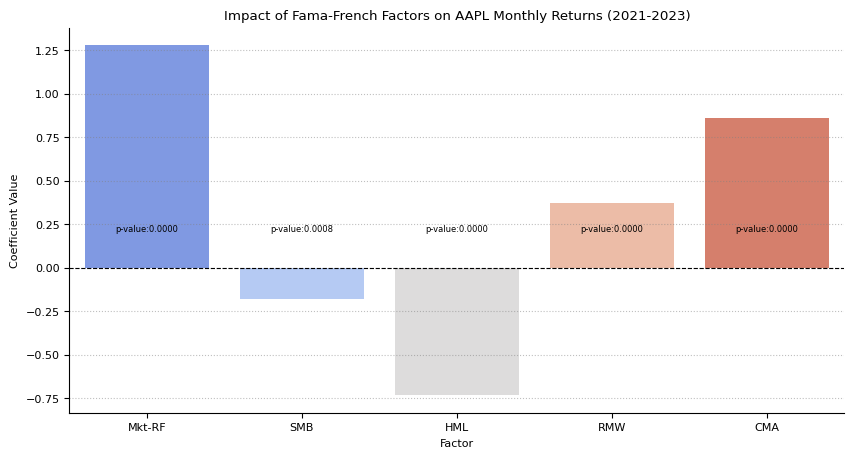

In [ ]:
factors = model_ff5.params.index[1:]
coefficients = model_ff5.params.values[1:]
confidence_intervals = model_ff5.conf_int().diff(axis=1).iloc[1]

ols_data = pd.DataFrame(
    {
        "Factor": factors,
        "Coefficient": coefficients,
        "Confidence_Lower": confidence_intervals[0],
        "Confidence_Upper": confidence_intervals[1],
    }
)

plt.figure(figsize=(10, 5))
sns.barplot(x="Factor", y="Coefficient", data=ols_data, capsize=0.2, palette="coolwarm")

for i, row in ols_data.iterrows():
    plt.text(i,0.2,f"p-value:{model_ff5.pvalues[row['Factor']]:.4f}",ha="center",va="bottom",
        fontsize=6,
    )

plt.title("Impact of Fama-French Factors on AAPL Monthly Returns (2021-2023)")
plt.xlabel("Factor"); plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.show()


From the resulting table we could observe that the FF5 model did a better job at capturing the variation in AAPL stock return than FF3 did, the R2 went up from 0.7 in FF3 OLS regressioto 0.74 in FF5 OLS regression

In this test, apart from Mkt-RF factor, AAPL stock return has strongest negative betas to the HML and CMA factors, which are -0.73 and 0.85 respectively. This phenomenon confirm the view that AAPL is a growth stock and its return behave like those of conservative firm a lot (CMA = 0.85) but also boast robust profitability (RMW = 0.37). The size premium (SMB) coefficient droped to -0.18 show that in the FF5 version, the size factor does not contribute much into variation of APPL stock and it could be redundant.


# Step 5

**a. Correlation matrix of factor returns**

,Mkt-RF,SMB,HML,RMW,CMA
Mkt-RF,1.000000,0.232529,-0.362551,-0.359140,-0.465451
SMB,0.232529,1.000000,0.135948,-0.409358,-0.005788
HML,-0.362551,0.135948,1.000000,0.431293,0.745326
RMW,-0.359140,-0.409358,0.431293,1.000000,0.398205
CMA,-0.465451,-0.005788,0.745326,0.398205,1.000000


Text(0.5, 1.0, 'FF5 factors corelation matrix')

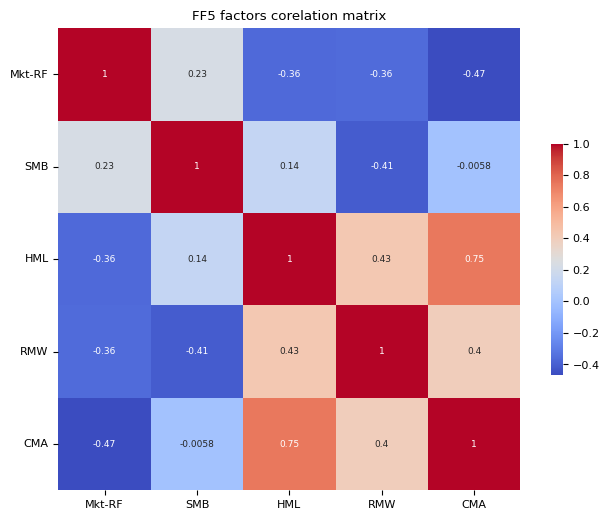

In [ ]:
corr = ff_factors_subset.iloc[:,:5].corr()
display(corr)
plt.figure(figsize = (8,6))
plt.grid()
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# ax = sns.heatmap(corr_matrix, mask = mask, robust = True, cmap = 'coolwarm', square=True,
#     annot=True, annot_kws={'size': 6.5}, cbar_kws={'shrink': 0.5})
ax = sns.heatmap(corr, robust = True, cmap = 'coolwarm', square=True,
    annot=True, annot_kws={'size': 6.5}, cbar_kws={'shrink': 0.5})

plt.yticks(rotation=0, ha='right')
plt.title('FF5 factors corelation matrix')

In the recent 2 years, we could observe that the risk factors in FF5 model are all interrelated at some extend. The SMB factor show that it has the least correlation with other factors among all. On the contrary, the RMW factor's correlation with others tend to be steady with the absolute value of all the RMW correlation fall within a rangr of 0.36-0.4. Noticeably, the HML and CMA post significantly correlation of 0.75 which could indicate a trend in the return of the cross-sectional conservative and growth stocks.


# Step 6


In [ ]:
ff5_betas = model_ff5.params.values[1:]
ff5_betas = np.round(ff5_betas, 2)

In [ ]:
ff3_betas = model_ff3.params.values[1:]
ff3_betas = np.append(ff3_betas, [np.nan, np.nan])
ff3_betas = np.round(ff3_betas, 2)

In [ ]:
from tabulate import tabulate
beta_df = pd.DataFrame(data = {'FF3' :ff3_betas, 'FF5': ff5_betas })
beta_df.loc[len(beta_df)] = np.round([model_ff3.rsquared,model_ff5.rsquared],2)
beta_df.index = ["Mkt-RF", "SMB", "HML", "RMW", "CMA",'R2']
print('Table 1 : FF3 and FF5 comparison \n')
print(beta_df.to_markdown())
# print(tabulate(beta_df))

Table 1 : FF3 and FF5 comparison 

|        |    FF3 |   FF5 |
|:-------|-------:|------:|
| Mkt-RF |   1.16 |  1.28 |
| SMB    |  -0.34 | -0.18 |
| HML    |  -0.34 | -0.73 |
| RMW    | nan    |  0.37 |
| CMA    | nan    |  0.86 |
| R2     |   0.69 |  0.74 |


The effect on the regression result of the 2 additional factors (CMA and RMW) has been addressed in step 4 :

From the resulting table we could observe that the FF5 model did a better job at capturing the variation in AAPL stock return than FF3 did, the R2 went up from 0.7 in FF3 OLS regression 0.74 in FF5 OLS regression

In this test, apart from Mkt-RF factor, AAPL stock return has the strongest negative betas to the HML and CMA factors, which are -0.73 and 0.85 respectively. This phenomenon confirms the view that AAPL is a growth stock and its returns behave like those of a conservative firm a lot (CMA = 0.85) but also boast robust profitability (RMW = 0.37). The size premium (SMB) coefficient dropped to -0.18 showing that in the FF5 version, the size factor does not contribute much to the variation of APPL stock and it could be redundant.

# Step 7

a. In this step, we will use the historical daily data of 5 stocks which are AAPL, AMZN, TSLA, META, MSFT to construct a optimal portfolio using Markowitz portfolio optimization.

In [ ]:
stocks = 'AAPL AMZN TSLA META MSFT'.split()
df = yf.download(stocks, start="2021-01-01", end="2023-12-31")['Adj Close']
returns_df = df.pct_change().dropna()


[*********************100%%**********************]  5 of 5 completed


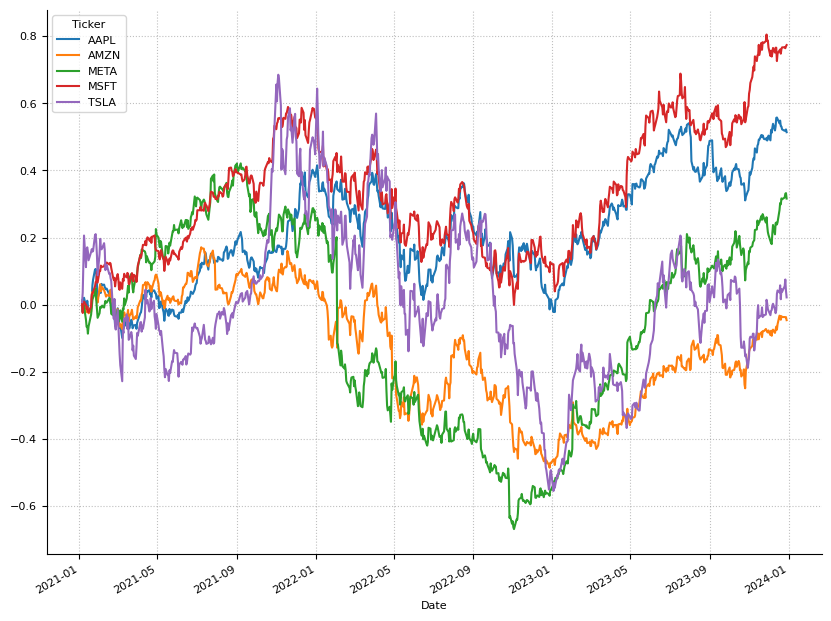

In [ ]:
returns_df.expanding().apply(lambda x : np.prod(1+x) - 1).plot(figsize = (10,8))
plt.show()

In [ ]:
#Calculate tangency weights
sigma = returns_df.cov()*252
rf = 0.053
r = returns_df.mean() * 252 - rf
e = np.ones(len(r))
sigma_inv = np.linalg.inv(sigma)
v = (sigma_inv @ r)/ (r.T @ sigma_inv @ r)
w_tang = v / (v.T @ e) # optimal weights for tangency portfolio


In [ ]:
print('Optimal weights:')
for i in range(len(returns_df.columns)) :
    print(returns_df.columns[i], ': ', round(w_tang[i],2))

optP_returns =  returns_df @ w_tang.T
optP_volatility = np.std(optP_returns) * 252 **0.5
sharpe = (optP_returns.mean()*252 - rf)/optP_volatility

print('Tangency Portfolio Anualized return: ', round(optP_returns.mean()*252,2))
print('Tangency Portfolio Anualized Volatility: ', round(optP_volatility,2))
print('Tangency Portfolio Sharpe ratio: ', round(sharpe,2))

Optimal weights:
AAPL :  0.23
AMZN :  -1.05
META :  0.15
MSFT :  1.64
TSLA :  0.02
Tangency Portfolio Anualized return:  0.4
Tangency Portfolio Anualized Volatility:  0.4
Tangency Portfolio Sharpe ratio:  0.87


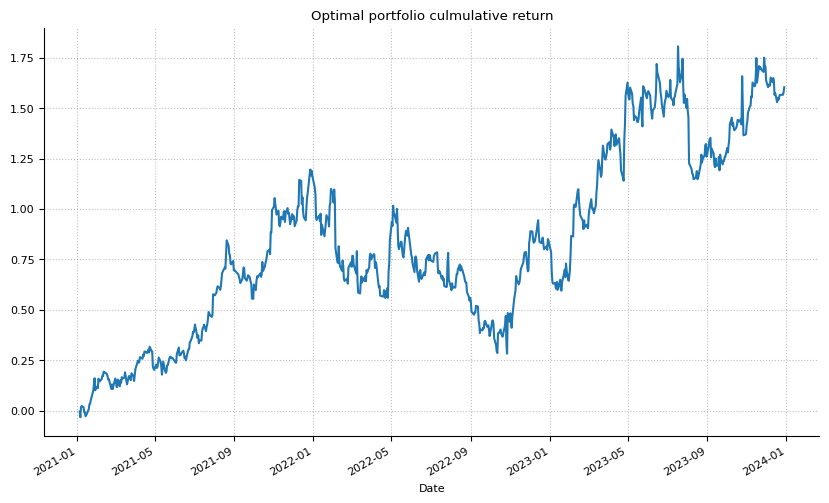

In [ ]:
opt_history = optP_returns.expanding().apply(lambda x : np.prod(1+x) - 1)
# plt.plot(opt_history.index, opt_history)
opt_history.plot(title = 'Optimal portfolio culmulative return', figsize = (10,6))
plt.show()

In [ ]:
optP_returns.index = optP_returns.index.to_period("D")
ff_factors_subset_opt = ff_factors_daily[ff_factors_daily.index.isin(optP_returns.index)].copy()

In [ ]:
ff_factors_subset_opt['Opt Porfolio Excess Ret'] = optP_returns * 100 - ff_factors_subset_opt['RF']
ff_factors_subset_opt

,Mkt-RF,SMB,HML,RMW,CMA,RF,Opt Porfolio Excess Ret
Date,,,,,,,
2021-01-05,0.86,1.32,0.49,0.36,0.55,0.000,-0.470679
2021-01-06,0.79,3.15,3.94,0.06,0.53,0.000,-2.798191
2021-01-07,1.76,0.02,-0.83,-1.50,-0.20,0.000,5.155283
2021-01-08,0.51,-1.01,-1.37,-0.43,-0.37,0.000,0.625661
2021-01-11,-0.51,0.54,1.26,-0.17,0.45,0.000,-0.657225
...,...,...,...,...,...,...,...
2023-12-22,0.20,0.61,0.09,-0.64,0.19,0.021,0.545609
2023-12-26,0.48,0.81,0.46,-0.34,-0.15,0.021,0.051399
2023-12-27,0.16,0.16,0.12,-0.32,-0.14,0.021,-0.050715


b. Regress the optimal portfoio on FF3

In [ ]:
X_opt = sm.add_constant(ff_factors_subset_opt[["Mkt-RF", "SMB", "HML"]])
y_opt = ff_factors_subset_opt['Opt Porfolio Excess Ret']
model_FF3_opt = sm.OLS(y_opt, X_opt).fit()
print(model_FF3_opt.summary())


                               OLS Regression Results                              
Dep. Variable:     Opt Porfolio Excess Ret   R-squared:                       0.247
Model:                                 OLS   Adj. R-squared:                  0.244
Method:                      Least Squares   F-statistic:                     81.70
Date:                     Sat, 04 May 2024   Prob (F-statistic):           1.00e-45
Time:                             19:08:15   Log-Likelihood:                -1646.5
No. Observations:                      752   AIC:                             3301.
Df Residuals:                          748   BIC:                             3320.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

b. Regress the optimal portfoio on FF5

In [ ]:
X_opt = sm.add_constant(ff_factors_subset_opt[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]])
y_opt = ff_factors_subset_opt['Opt Porfolio Excess Ret']
model_FF5_opt = sm.OLS(y_opt, X_opt).fit()
print(model_FF5_opt.summary())


                               OLS Regression Results                              
Dep. Variable:     Opt Porfolio Excess Ret   R-squared:                       0.310
Model:                                 OLS   Adj. R-squared:                  0.305
Method:                      Least Squares   F-statistic:                     67.04
Date:                     Sat, 04 May 2024   Prob (F-statistic):           7.22e-58
Time:                             19:08:15   Log-Likelihood:                -1613.6
No. Observations:                      752   AIC:                             3239.
Df Residuals:                          746   BIC:                             3267.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

# Step 8 - Summary

From the resulting table of step 7 we can see that the explanatory power of the FF3 and FF5 factors on the return of our optimal porfolio is astonishingly low compared to its performance with APPL stock, the R2 of the regression models is only 0.247, and 0.31 respectively albeit the coefficients in both models are statistically significant. This phenomenon could be explained by the fact that our portfolio was optimized and it has allocated too much capital on one stock ( MSFT) and shorted sell heavily another stock (AMZN) thus generating artificial returns that could not be explained by normal well-known factors.

Of all the factors, the Market premium still has the strongest positive beta with our porfolio which is 0.94 and 1.11 respectively, this phenomenon is understandable since our porfolio is still within the investable universe of the market after all. As for the other factor, SMB and HML show a considerable negative relation with the portfolio return in both FF3 and FF5. On the contrary, the CMA and RMW factors scored positively large beta in the regression test with the value of 0.8 and 1.1 respectively, this occurrence could be because our tangent portfolio focuses mainly on large cap stock with low investment and strong profitability.

In summary, in this GWP we have conducted several regressions on the notorious FF3 and FF5 factors and have concluded that while the FF3 and FF5 could do a decent job of explaining the variation of the AAPL stock (FF5 is obviously superior to FF3), but it has done a suboptimal job in relating the return of the tangency portfolio to its factors.

